In [3]:
"""
@author: Gautam Verma
"""

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


# enable inline comment

In [ ]:
%matplotlib inline

In [4]:
#use pandas library to read  .csv file of passengers on titanic and store in a dataframe object
titanic=pd.read_csv("C:/Train/JKT/Dataset/Titanic.csv") #either import from local machine or load from jupyter directory

In [6]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
#check for uniqueness
(np.unique(titanic['Pclass'].values).size,
 titanic['Pclass'].values.size)


(3, 891)

In [9]:
#check basic information about the dataframe
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
#get counts by sex or gender
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
'''
Let's create some plots of various features vs. survival, to see the kind of distributions that are present in the data, 
and to check if there is any obvious correlation. 
First, let's split the data between passengers who survived and passengers who died.
'''
survived_data = titanic.loc[titanic['Survived']==1,:]
died_data = titanic.loc[titanic['Survived']==0, :]

In [12]:
survived_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [13]:
# Split the survived and died data between male and female
survived_male_data = survived_data.loc[survived_data['Sex']=='male',:]
died_male_data = died_data.loc[died_data['Sex']=='male',:]
survived_female_data = survived_data.loc[survived_data['Sex']=='female',:]
died_female_data = died_data.loc[died_data['Sex']=='female',:]

In [14]:
# Total number of (fe)males that survived and that died
survived_male_n = survived_male_data.shape[0]
died_male_n = died_male_data.shape[0]
survived_female_n = survived_female_data.shape[0]
died_female_n = died_female_data.shape[0]

In [15]:
survived_male_n

109

In [16]:
# Extract the ticket fares for the various ticket classes
fare_1 = titanic['Fare'].loc[titanic['Pclass']==1]
fare_2 = titanic['Fare'].loc[titanic['Pclass']==2]
fare_3 = titanic['Fare'].loc[titanic['Pclass']==3]



In [21]:
titanic.loc[1:5,['Fare','PClass']]

,Fare,PClass
1,71.2833,NaN
2,7.9250,NaN
3,53.1000,NaN
4,8.0500,NaN
5,8.4583,NaN


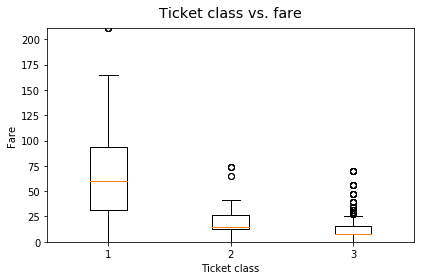

In [18]:
import matplotlib.pyplot as pp

# Boxplots
pp.boxplot([fare_1, fare_2, fare_3])
pp.ylim((0,titanic['Fare'].quantile(0.98))) 
# Only the lowest 98% of fares are shown because 
# otherwise the boxes would be hard to compare visually

# Plot settings
pp.ylabel('Fare')
pp.xlabel('Ticket class')
pp.title('Ticket class vs. fare', fontsize = 'x-large', y=1.02)
pp.tight_layout()
pp.show()

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(titanic, test_size=0.3) #you can give multiple inputs to be split. Eg- X and Y separately

In [20]:
#cleaning the train data
train.Embarked = train['Embarked'].fillna('S')
train.Age = train['Age'].fillna(np.mean(train.Age))
train.Age[train.Age <= 18 ] = 1
train.Age[train.Age > 18 ] = 0           
train['Sex'][train['Sex'] == 'male'] = 0  
train['Sex'][train['Sex'] == 'female'] = 1 
train.Embarked[train.Embarked == 'S'] = 1 
train.Embarked[train.Embarked == 'C'] = 2 
train.Embarked[train.Embarked == 'Q'] = 3 


C:\Users\Gautam\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\Gautam\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Gautam\Anaconda3\lib\site-packages\pandas\core\generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(ne

In [21]:
#cleaning the test data
test.Embarked = test['Embarked'].fillna('S')
test.Age = test['Age'].fillna(np.mean(test.Age))
test.Fare = test['Fare'].fillna(np.mean(test.Fare))
test.Age[test.Age <= 18 ] = 1
test.Age[test.Age > 18 ] = 0           
test['Sex'][test['Sex'] == 'male'] = 0  
test['Sex'][test['Sex'] == 'female'] = 1 
test.Embarked[test.Embarked == 'S'] = 1
test.Embarked[test.Embarked == 'C'] = 2 
test.Embarked[test.Embarked == 'Q'] = 3 

C:\Users\Gautam\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\Gautam\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Gautam\Anaconda3\lib\site-packages\pandas\core\generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Gautam\Anaconda3\

In [22]:
#Splitting the data into features(X) and targets(y)             
y_train = train.Survived.values
X_train = train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].values


In [23]:
y_test = test.Survived.values
X_test = test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].values               

In [22]:
#logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
ylog_pred = logreg.predict(X_test)

NameError: name 'X_train' is not defined

In [25]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, ylog_pred))

[[137  25]
 [ 38  68]]


In [26]:
print(metrics.classification_report(y_test, ylog_pred))

             precision    recall  f1-score   support

          0       0.78      0.85      0.81       162
          1       0.73      0.64      0.68       106

avg / total       0.76      0.76      0.76       268



In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ylog_pred))

             precision    recall  f1-score   support

          0       0.78      0.85      0.81       162
          1       0.73      0.64      0.68       106

avg / total       0.76      0.76      0.76       268



In [11]:
solution = pd.DataFrame({'Survived':np.array(ylog_pred)}, index=test.PassengerId)
solution.to_csv('copy_of_solution.csv')